In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing the Automobile Insurance Dataset:

In [ ]:
aic=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Auto_Insurance_Claims_amount.csv')
aif=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Automobile_insurance_fraud.csv')

Identification of data types:

In [ ]:
#Auto_Insurance_Claims_amount
aic.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [ ]:
#Automobile_insurance_fraud

aif.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Size of the dataset:

In [ ]:
print('Size of Auto_Insurance_Claims_amount dataset:', aic.shape)
print('Size of Automobile_insurance_fraud dataset:', aif.shape)

Size of Auto_Insurance_Claims_amount dataset: (9134, 26)
Size of Automobile_insurance_fraud dataset: (1000, 40)


Statistical Summary of Numeric Variables:

In [ ]:
#Auto_Insurance_Claims_amount dataset
aic.describe

<bound method NDFrame.describe of      Customer Country  ...  Vehicle Class Vehicle Size
0     BU79786      US  ...   Two-Door Car      Medsize
1     QZ44356      US  ...  Four-Door Car      Medsize
2     AI49188      US  ...   Two-Door Car      Medsize
3     WW63253      US  ...            SUV      Medsize
4     HB64268      US  ...  Four-Door Car      Medsize
...       ...     ...  ...            ...          ...
9129  LA72316      US  ...  Four-Door Car      Medsize
9130  PK87824      US  ...  Four-Door Car      Medsize
9131  TD14365      US  ...  Four-Door Car      Medsize
9132  UP19263      US  ...  Four-Door Car        Large
9133  Y167826      US  ...   Two-Door Car      Medsize

[9134 rows x 26 columns]>

In [ ]:
#Automobile_insurance_fraud dataset
aif.describe

<bound method NDFrame.describe of      months_as_customer  age  policy_number  ... auto_year fraud_reported _c39
0                   328   48         521585  ...      2004              Y  NaN
1                   228   42         342868  ...      2007              Y  NaN
2                   134   29         687698  ...      2007              N  NaN
3                   256   41         227811  ...      2014              Y  NaN
4                   228   44         367455  ...      2009              N  NaN
..                  ...  ...            ...  ...       ...            ...  ...
995                   3   38         941851  ...      2006              N  NaN
996                 285   41         186934  ...      2015              N  NaN
997                 130   34         918516  ...      1996              N  NaN
998                 458   62         533940  ...      1998              N  NaN
999                 456   60         556080  ...      2007              N  NaN

[1000 rows x 40 c

In [ ]:
#Auto_Insurance_Claims_amount dataset
aic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [ ]:
#Automobile_insurance_fraud dataset
aif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Cleaning of the data

In [ ]:
#Finding null values
#Auto_Insurance_Claims_amount dataset

print(aic.isnull().sum(axis = 0))

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [ ]:
#Finding null values
#Automobile_insurance_fraud dataset

print(aif.isnull().sum(axis = 0))

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#Remove Null Values
#Automobile_insurance_fraud dataset

aif._c39.fillna(value=14.454200,inplace=True)

In [ ]:
#Check if the null values are resolved
#Automobile_insurance_fraud dataset

print(aif.isnull().sum(axis = 0))

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Non-Graphical Univariate Analysis:

Graphical Univariate Analysis:

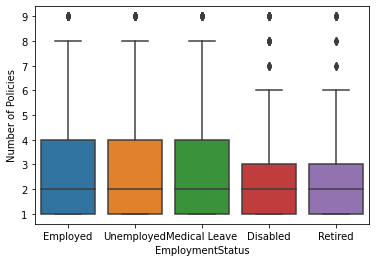

In [ ]:
#Boxplot
#Auto_Insurance_Claims_amount dataset
#Plot bto determine Number of policies  depending of the Employee Status
sns.boxplot(x=aic['EmploymentStatus'],y=aic['Number of Policies'])

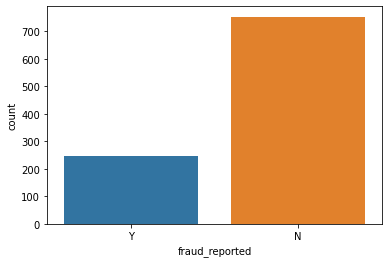

In [ ]:
#Automobile_insurance_fraud dataset
#CountPlot
sns.countplot(aif['fraud_reported'])
plt.show()

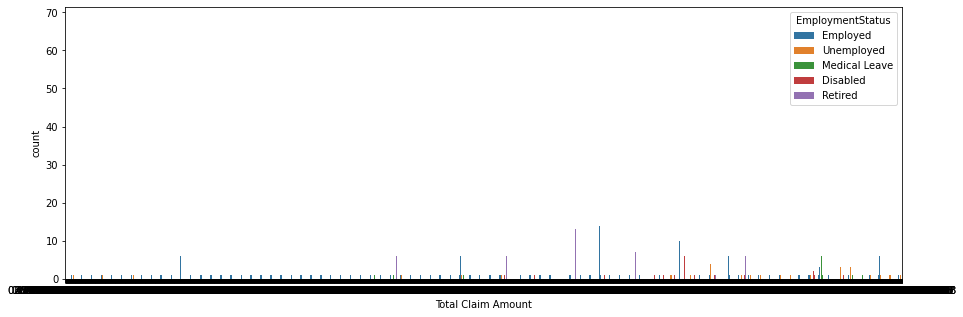

In [ ]:
#Plot to display Total Claim Amount V/S EmploymentStatus
#Auto_Insurance_Claims_amount dataset

plt.figure(figsize=(15, 5))
ro = sns.countplot(aic['Total Claim Amount'], hue=aic['EmploymentStatus'])
ro.set_xticklabels(ro.get_xticklabels())
plt.show()

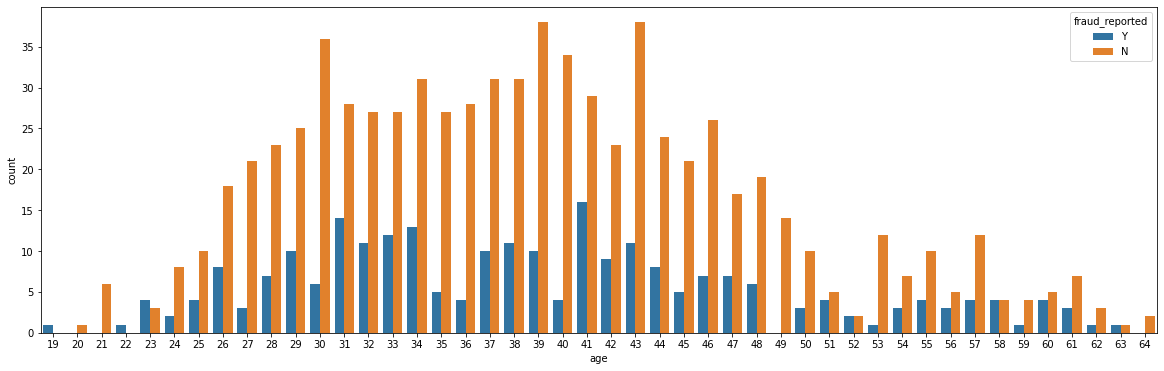

In [ ]:
#Plot showing income range of individuals of different countries

plt.figure(figsize=(20, 6))
sns.countplot(aif['age'], hue=aif['fraud_reported'])
plt.show()

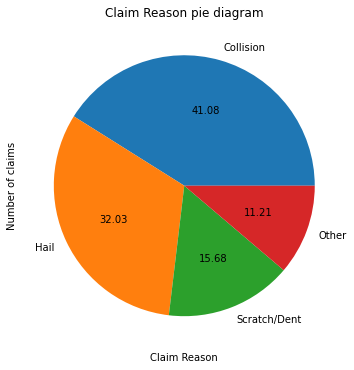

In [ ]:
#Pie-Chart displaying different types of claims and their counts

aic['Claim Reason'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Claim Reason pie diagram")
plt.ylabel('Number of claims')
plt.xlabel('Claim Reason');

In [ ]:
#Checking the skewness
print('Skewness of Auto_Insurance_Claims_amount dataset:', aic.skew())
print('Skewness of Automobile_insurance_fraud dataset:', aif.skew())

Skewness of Auto_Insurance_Claims_amount dataset: Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64
Skewness of Automobile_insurance_fraud dataset: months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -

In [ ]:
#checking for correaltion between variables
#Auto_Insurance_Claims_amount dataset

aic.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [ ]:
#Automobile_insurance_fraud dataset

aif.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000e+00,9.220983e-01,5.755503e-02,0.026807,5.017684e-03,0.015498,1.789476e-02,6.399319e-03,2.020921e-02,7.063925e-02,1.473590e-02,-1.016156e-02,5.838279e-02,6.210800e-02,6.532879e-02,3.493981e-02,6.101288e-02,-2.923654e-04,1.673643e-16
age,9.220983e-01,1.000000e+00,5.941348e-02,0.029188,1.440373e-02,0.018126,2.560418e-02,-7.075078e-03,7.367736e-03,8.716148e-02,2.210211e-02,-1.567909e-02,5.235872e-02,6.986263e-02,7.552226e-02,6.089753e-02,6.258764e-02,1.353608e-03,1.604875e-16
policy_number,5.755503e-02,5.941348e-02,1.000000e+00,-0.006738,2.256568e-02,0.008968,7.083206e-03,9.802475e-03,-5.669097e-03,1.126629e-04,1.343180e-02,-4.558467e-03,-1.266144e-02,-1.800944e-02,-8.761632e-03,-1.067806e-02,-2.018363e-02,-1.829919e-04,-3.412263e-16
policy_deductable,2.680740e-02,2.918762e-02,-6.737532e-03,1.000000,-3.245446e-03,0.010870,4.544834e-03,3.521172e-02,-2.354408e-02,6.093509e-02,5.121441e-02,-2.276458e-02,6.663852e-02,2.283932e-02,3.910677e-02,6.479153e-02,5.269088e-03,2.610456e-02,0.000000e+00
policy_annual_premium,5.017684e-03,1.440373e-02,2.256568e-02,-0.003245,1.000000e+00,-0.006247,3.235416e-02,-1.373840e-02,2.354676e-02,-1.578355e-03,-4.599125e-02,2.677986e-02,2.331614e-03,9.093729e-03,-1.763269e-02,-1.165388e-02,2.024644e-02,-4.922588e-02,7.560667e-15
umbrella_limit,1.549844e-02,1.812627e-02,8.967543e-03,0.010870,-6.246803e-03,1.000000,1.967137e-02,-4.726824e-02,-2.405564e-02,-2.325688e-02,-2.127015e-02,2.274261e-02,-6.738320e-03,-4.034409e-02,-4.541162e-02,-2.379031e-02,-3.858426e-02,9.893274e-03,0.000000e+00
insured_zip,1.789476e-02,2.560418e-02,7.083206e-03,0.004545,3.235416e-02,0.019671,1.000000e+00,6.302848e-03,4.937190e-02,8.274121e-03,2.744806e-02,2.869546e-02,1.980529e-02,-3.387336e-02,-1.749482e-02,-6.840626e-03,-4.108348e-02,-3.273570e-02,-6.004755e-17
capital-gains,6.399319e-03,-7.075078e-03,9.802475e-03,0.035212,-1.373840e-02,-0.047268,6.302848e-03,1.000000e+00,-4.690445e-02,-1.640561e-02,6.164260e-02,5.582919e-02,-1.765138e-02,1.598047e-02,2.593370e-02,-7.790445e-04,1.583620e-02,3.139806e-02,-8.300052e-17
capital-loss,2.020921e-02,7.367736e-03,-5.669097e-03,-0.023544,2.354676e-02,-0.024056,4.937190e-02,-4.690445e-02,1.000000e+00,-2.505375e-02,-1.489494e-02,-2.441815e-02,-4.132987e-02,-3.606030e-02,-4.605991e-02,-2.286344e-02,-3.266510e-02,-5.661502e-02,-2.180792e-16
incident_hour_of_the_day,7.063925e-02,8.716148e-02,1.126629e-04,0.060935,-1.578355e-03,-0.023257,8.274121e-03,-1.640561e-02,-2.505375e-02,1.000000e+00,1.207943e-01,-3.456318e-02,6.526916e-03,2.177024e-01,1.657679e-01,1.795359e-01,2.156256e-01,2.136762e-02,2.383886e-17


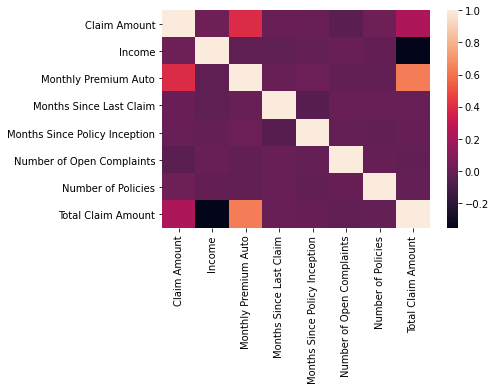

In [ ]:
#Checking correlation using Heatmap
#Auto_Insurance_Claims_amount dataset
sns.heatmap(aic.corr())

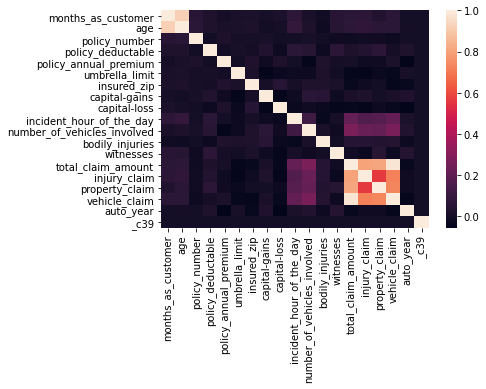

In [ ]:
#Automobile_insurance_fraud dataset

sns.heatmap(aif.corr())

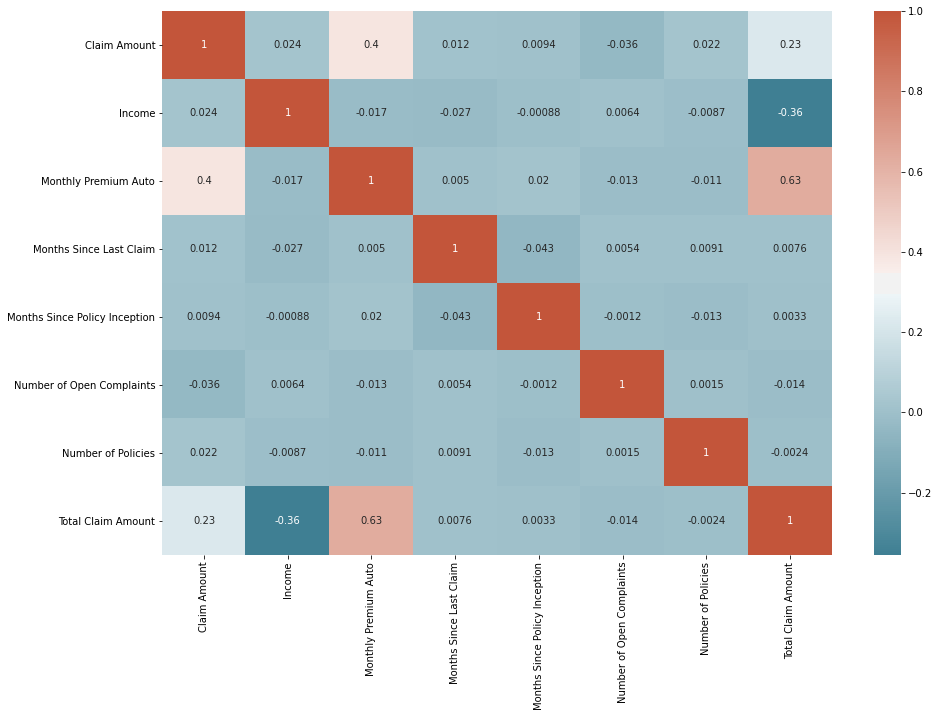

In [ ]:
#Auto_Insurance_Claims_amount dataset
corr = aic.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

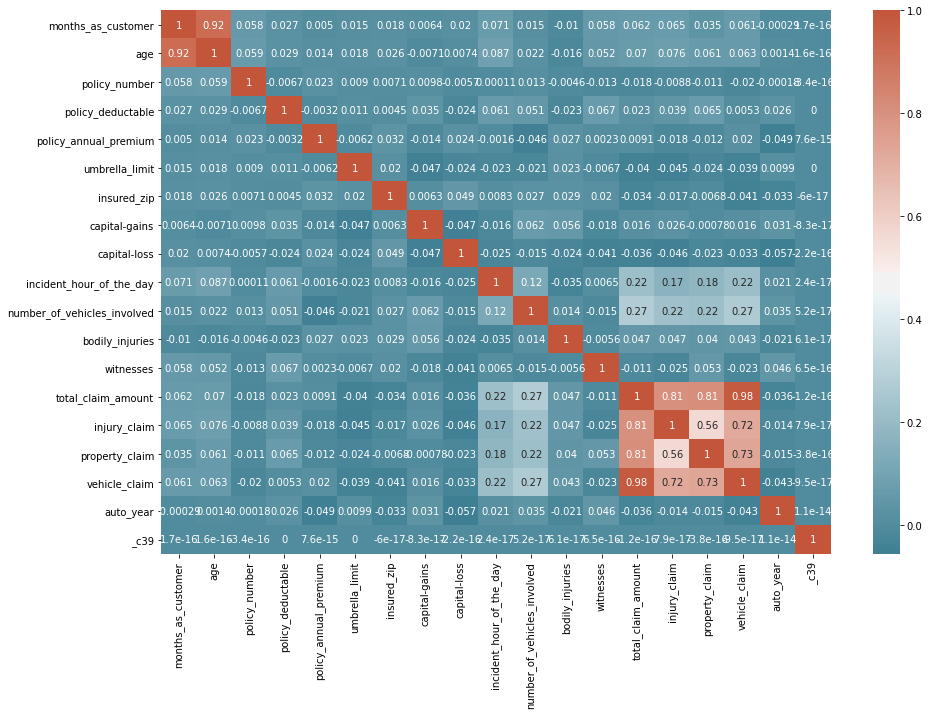

In [ ]:
#Automobile_insurance_fraud dataset
corr = aif.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#using label encoding and one-hot encoding
#Auto_Insurance_Claims_amount dataset

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
aic['Total Claim Amount'] = le.fit_transform(aic['Total Claim Amount'])
aic['Gender'] = le.fit_transform(aic['Gender'])
aic.head(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,0,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,2941,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,0,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,4880,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,0,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,3897,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,1,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,3764,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,1,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,1138,Four-Door Car,Medsize


In [ ]:
#dummifying data required for spliting the data

aic = pd.get_dummies(aic)
aic.head(5)

,Claim Amount,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer_AA10041,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,Customer_AB21519,Customer_AB23825,Customer_AB26022,Customer_AB31813,Customer_AB45325,Customer_AB60627,Customer_AB62982,Customer_AB69140,Customer_AB72731,Customer_AB73565,Customer_AB78984,Customer_AB96670,Customer_AB98823,Customer_AC13887,Customer_AC22873,Customer_AC24378,Customer_AC40767,Customer_AC42963,Customer_AC58002,Customer_AC67315,...,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,0,56274,69,32,5,0,1,2941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,0,94,13,42,0,8,4880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1288.743165,0,48767,108,18,38,0,2,3897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,764.586183,1,0,106,18,65,0,7,3764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,281.369258,1,43836,73,12,44,0,1,1138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = aic['Total Claim Amount']
X = aic

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          39       0.00    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()

In [ ]:
models = []
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))

Decision Tree: 0.457412 (0.000381)
Decision Tree with Gini Coefficient: 0.455223 (0.000361)
K Nearest Neighbors: 0.194985 (0.000288)


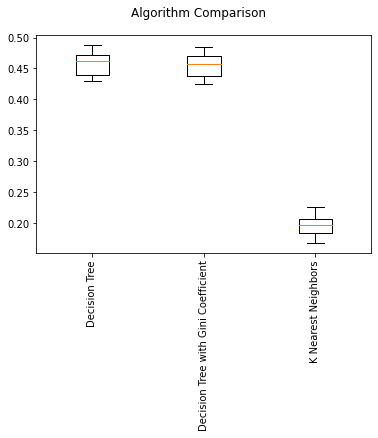

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#using label encoding and one-hot encoding
#Automobile_insurance_fraud dataset

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
aif['age'] = le.fit_transform(aif['age'])
aif['fraud_reported'] = le.fit_transform(aif['fraud_reported'])
aif.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,29,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,14.4542
1,228,23,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,14.4542
2,134,10,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,14.4542
3,256,22,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,14.4542
4,228,25,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,14.4542


In [ ]:
#dummifying data required for spliting the data

aif = pd.get_dummies(aif)
aif.head(5)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,policy_bind_date_01-01-2006,policy_bind_date_01-01-2008,policy_bind_date_01-02-1990,policy_bind_date_01-02-1998,policy_bind_date_01-02-2011,policy_bind_date_01-03-1991,policy_bind_date_01-03-1997,policy_bind_date_01-03-2002,policy_bind_date_01-03-2010,policy_bind_date_01-03-2012,policy_bind_date_01-04-1994,policy_bind_date_01-04-2002,policy_bind_date_01-05-1997,policy_bind_date_01-05-1999,policy_bind_date_01-05-2010,policy_bind_date_01-05-2013,policy_bind_date_01-06-1997,policy_bind_date_01-06-2006,policy_bind_date_01-07-2005,policy_bind_date_01-07-2013,...,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,29,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,14.4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,23,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1,14.4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,10,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,14.4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,22,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,14.4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,25,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,14.4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = aif['fraud_reported']
X = aif

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        70

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       180
           1       1.00      0.66      0.79        70

    accuracy                           0.90       250
   macro avg       0.94      0.83      0.87       250
weighted avg       0.92      0.90      0.90       250



In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))

Decision Tree: 1.000000 (0.000000)
K Nearest Neighbors: 0.704000 (0.001024)
Naive Bayes: 0.673000 (0.002101)
Random Forrest: 0.956000 (0.000284)


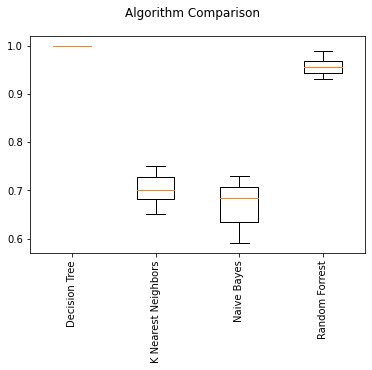

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(knn,'AutomobileInsuranceClaim.pkl')

['AutomobileInsuranceClaim.pkl']